# Lab 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.utils.data import download_file
from matplotlib.colors import LogNorm
import glob

# Measure the Bias and read noise

In [223]:
image_files = ["Ran_Shikha_Joshi/Bias_Read_Noise/CCD Image " + str(n) + ".fit" for n in range(3, 22)]

In [225]:
image_concat = np.array([fits.getdata(f) for f in image_files])

In [227]:
bias_levels = []
for i in image_concat:
    bias_levels.append(np.median(i))

In [229]:
noise_levels = []
for i in image_concat:
    noise_levels.append(np.std(i))

In [231]:
np.array(noise_levels)

array([23.3069391 , 23.41220651, 23.47792786, 23.44161814, 23.43611562,
       23.47510171, 23.432917  , 23.42423939, 23.44106369, 23.401801  ,
       23.43399927, 23.48989294, 23.48813215, 23.46757677, 23.45774301,
       23.42993286, 23.45604267, 23.4570954 , 23.47931475])

In [233]:
np.array(bias_levels)

array([603., 601., 600., 600., 600., 600., 600., 600., 600., 600., 599.,
       600., 600., 600., 599., 599., 599., 599., 599.])

In [257]:
bias = np.median(np.array(bias_levels))

In [397]:
read_noise = np.median(np.array(noise_levels))

In [399]:
df = pd.DataFrame({
    "Image #": list(range(3, 22)),
    "Bias Level (DN)": bias_levels,
    "Noise Level (DN)": noise_levels
})

print(df)

    Image #  Bias Level (DN)  Noise Level (DN)
0         3            603.0         23.306939
1         4            601.0         23.412207
2         5            600.0         23.477928
3         6            600.0         23.441618
4         7            600.0         23.436116
5         8            600.0         23.475102
6         9            600.0         23.432917
7        10            600.0         23.424239
8        11            600.0         23.441064
9        12            600.0         23.401801
10       13            599.0         23.433999
11       14            600.0         23.489893
12       15            600.0         23.488132
13       16            600.0         23.467577
14       17            599.0         23.457743
15       18            599.0         23.429933
16       19            599.0         23.456043
17       20            599.0         23.457095
18       21            599.0         23.479315


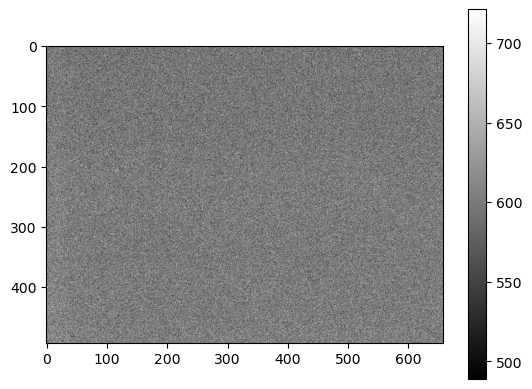

In [209]:
plt.imshow(fits.getdata(image_files[4]), cmap="gray")
plt.colorbar()
plt.savefig("Figures/zero_exposure_example")

# Linearity and Saturation

In [263]:
ordered = [25, 27, 28, 29, 26] + list(range(30, 39))
times = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014]

In [265]:
image_files = ["Ran_Shikha_Joshi/Linearity_Saturation/CCD Image " + str(n) + ".fit" for n in ordered]

In [267]:
means = []
for i in image_files:
    data = fits.getdata(i)
    means.append(np.mean(data) - bias)

In [269]:
m, b = np.polyfit(times, means, 1)

print(f"Slope = {m:.3f}, Intercept = {b:.3f}")



Slope = 2135.303, Intercept = -2.450


In [273]:
df = pd.DataFrame({
    "Exposure Time": times,
    "Signal (DN)": means,
})

print(df)

    Exposure Time  Signal (DN)
0           0.001    -0.184802
1           0.002     1.423085
2           0.003     3.257135
3           0.004     5.722190
4           0.005     8.753626
5           0.006    11.252647
6           0.007    12.219626
7           0.008    15.094027
8           0.009    16.984972
9           0.010    19.176588
10          0.011    21.160637
11          0.012    22.707224
12          0.013    25.475217
13          0.014    26.867747


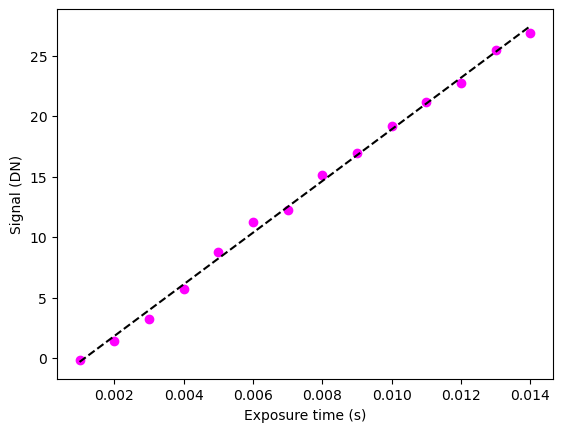

In [271]:
plt.plot(times, means, 'o', color='magenta')
plt.plot(times, m * np.array(times) + b, color='black', linestyle='dashed')
plt.xlabel("Exposure time (s)")
plt.ylabel("Signal (DN)")
plt.savefig("Figures/linearity_saturation")

# Dark Current

## Cooler Off

In [413]:
ordered = range(39, 49)
image_files = ["Ran_Shikha_Joshi/Dark_Current/Cooler_Off/CCD Image " + str(n) + ".fit" for n in ordered]

In [415]:
times = [0.1, 1, 5, 10, 20, 40, 60, 80, 160, 320]

In [417]:
means = []
for i in image_files:
    data = fits.getdata(i)
    means.append(np.mean(data) - bias)

In [419]:
slope, intercept = np.polyfit(times, means, 1)
dDNdtoff = slope
print(f"dDN/dt={dDNdtoff} DN/s")

dDN/dt=0.18620214523705836 DN/s


In [421]:
df = pd.DataFrame({
    "Exposure Time": times,
    "Signal (DN)": means,
})

print(df)

   Exposure Time  Signal (DN)
0            0.1     1.493822
1            1.0     9.466192
2            5.0    17.970328
3           10.0    21.487545
4           20.0    25.492929
5           40.0    31.757132
6           60.0    36.321629
7           80.0    39.909800
8          160.0    52.611603
9          320.0    70.483431


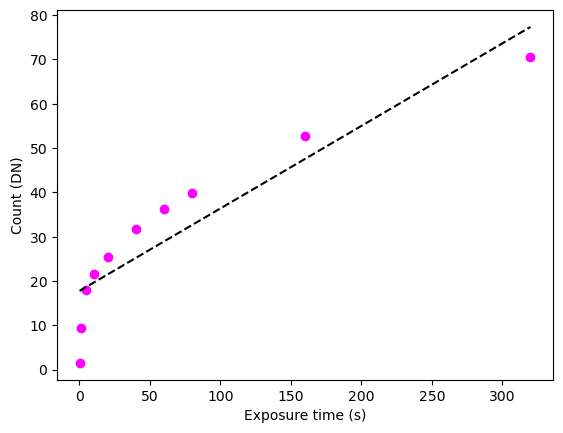

In [325]:
#plt.plot(times, maxes, 'o')
plt.plot(times, means, 'o', color='magenta')
plt.plot(times, slope * np.array(times) + intercept, color='black', linestyle='dashed')
plt.xlabel("Exposure time (s)")
plt.ylabel("Count (DN)")
plt.savefig("Figures/darkcurrentcooleroff")

## Cooler On

In [423]:
ordered = range(49, 58)
image_files = ["Ran_Shikha_Joshi/Dark_Current/Cooler_On/CCD Image " + str(n) + ".fit" for n in ordered]

In [425]:
times = [0.1, 1, 5, 10, 20, 40, 80, 160, 320]

In [427]:
means = []
for i in image_files:
    data = fits.getdata(i)
    means.append(np.mean(data))

In [429]:
slope, intercept = np.polyfit(times, means, 1)
dDNdt = slope
print(f"dDN/dt={dDNdt} DN/s")

dDN/dt=0.043339212304942115 DN/s


In [343]:
df = pd.DataFrame({
    "Exposure Time": times,
    "Signal (DN)": means,
})

print(df)

   Exposure Time  Signal (DN)
0            0.1   701.940992
1            1.0   707.632278
2            5.0   712.530809
3           10.0   714.898742
4           20.0   717.496432
5           40.0   719.620558
6           80.0   721.745540
7          160.0   721.914276
8          320.0   722.832845


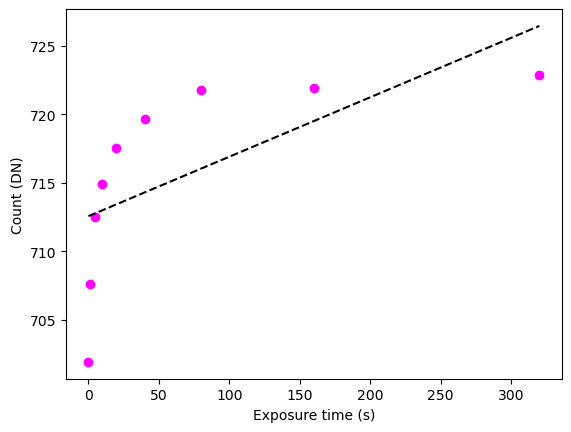

In [341]:
#plt.plot(times, maxes, 'o')
plt.plot(times, means, 'o', color='magenta')
plt.plot(times, slope * np.array(times) + intercept, color='black', linestyle='dashed')
plt.xlabel("Exposure time (s)")
plt.ylabel("Count (DN)")
plt.savefig("Figures/darkcurrentcooleron")

# Determining DNs to Electrons

In [361]:
ordered = range(64, 71)
image_files = ["Ran_Shikha_Joshi/DN_To_Electron/Good_Data/CCD Image " + str(n) + ".fit" for n in ordered]

In [365]:
signals = []
noises = []
for i in image_files:
    data = fits.getdata(i)
    signal = data - bias
    signals.append(np.mean(signal))
    noises.append(np.std(signal))

In [393]:
df = pd.DataFrame({
    "Noise (DN)": noises,
    "Signal (DN)": signals,
})

print(df)

   Noise (DN)   Signal (DN)
0   39.390281    386.553318
1   78.024888   1740.801940
2  104.106513   3097.101586
3  234.658143  13898.339931
4  353.470844  27215.877159
5  542.887100  53166.579803
6  143.560704  64919.315396


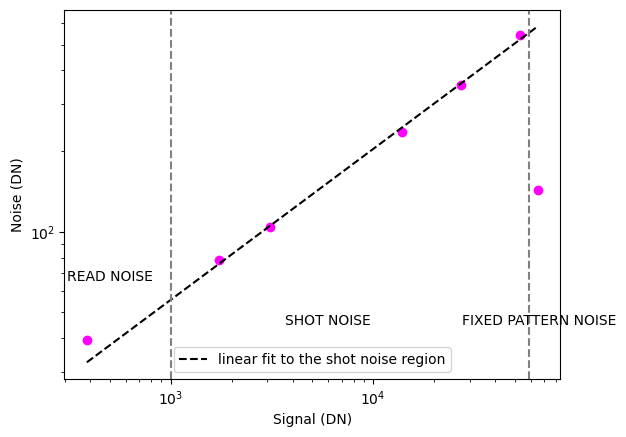

In [387]:
plt.loglog(signals, noises, 'o', color='magenta')
plt.loglog(x_fit, y_fit, color='black', linestyle='dashed', label='linear fit to the shot noise region')
plt.axvline(x=1000, color='gray', linestyle='--')    
plt.axvline(x=59000, color='gray', linestyle='--')
plt.text(500, 64, "READ NOISE", ha='center', va='bottom')
plt.text(66000, 44, "FIXED PATTERN NOISE", ha='center', va='bottom')
plt.text(6000, 44, "SHOT NOISE", ha='center', va='bottom')
plt.xlabel("Signal (DN)")
plt.ylabel("Noise (DN)")
plt.legend()
plt.savefig("Figures/dntoelectron")

In [389]:
log_means = np.log10(signals)
log_noises = np.log10(noises)

In [391]:
x = log_means[1:6]
y = log_noises[1:6]

# Fit y = m*x + b
m, b = np.polyfit(x, y, 1)

print(f"Slope = {m:.3f}, Intercept = {b:.3f}")

# Gain from vertical displacement (b)
G = 10**(-2*b)  # because Noise = (1/sqrt(G))*Signal^(1/2)
print(f"Gain (e-/DN): {G:}")


Slope = 0.564, Intercept = 0.052
Gain (e-/DN): 0.786436244443278


In [377]:
x_fit = np.logspace(np.min(log_means), np.max(log_means), 100)  # linear space x
y_fit = 10**(m * np.log10(x_fit) + b)  

In [405]:
read_noise * G # read noise in number of electrons

np.float64(18.435338132822796)

In [431]:
dDNdt * G # dark current in number of electrons per sec

np.float64(0.034083527362228576)

In [433]:
dDNdtoff * G # dark current in number of electrons per sec

np.float64(0.14643611580751398)

In [435]:
signals[-2] * G # full well capacity in terms of electrons

np.float64(41812.12534991249)

# Long Exposures and Cosmic Rays

In [3]:
atik_titan = sorted(glob.glob("CRtest/" + "*.fit")) 
andor = sorted(glob.glob("AndorCCD-CosmicRays/" + "*dark.fit")) 

In [5]:
images_atik_titan = []
images_andor = []
for f in atik_titan:
    data = fits.getdata(f)
    images_atik_titan.append(data)
for f in andor:
    data = fits.getdata(f)
    images_andor.append(data)

In [7]:
median_image_at = np.median(images_atik_titan, axis=0)
mad_at = np.median(np.abs(median_image_at - np.median(median_image_at)))

# Hot pixel mask: e.g. > 10σ above background
hot_pixel_mask_at = (median_image_at > np.median(median_image_at) + 10*mad_at)


In [9]:
median_image_ad = np.median(images_andor, axis=0)
mad_ad = np.median(np.abs(median_image_ad - np.median(median_image_ad)))

# Hot pixel mask: e.g. > 10σ above background
hot_pixel_mask_ad = (median_image_ad > np.median(median_image_ad) + 10*mad_ad)


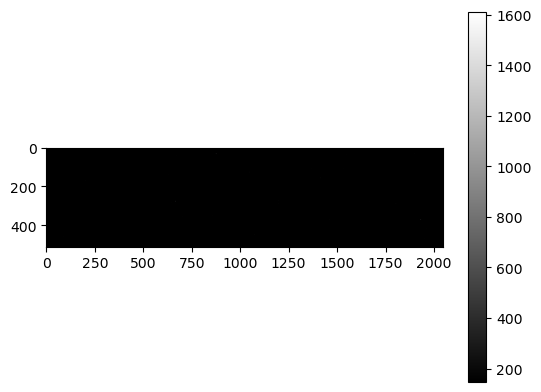

In [11]:
plt.imshow(images_andor[8], cmap="gray")
plt.colorbar()
#plt.savefig("Figures/zero_exposure_example")

In [57]:
def get_cosmic_ray_count(images, median_image, hot_pixel_mask):
    cosmic_ray_count = 0
    cosmic_ray_coords = []

    # Neighbor offsets for 8-connected pixels
    neighbors = [(-1,-1), (-1,0), (-1,1),
                 ( 0,-1),         ( 0,1),
                 ( 1,-1), ( 1,0), ( 1,1)]

    for idx, frame in enumerate(images):
        diff = frame - median_image
        diff[hot_pixel_mask] = 0

        sigma = np.std(diff)
        candidates = diff > 5 * sigma
        visited = np.zeros_like(candidates, dtype=bool)

        for y in range(candidates.shape[0]):
            for x in range(candidates.shape[1]):
                if candidates[y, x] and not visited[y, x]:
                    # New cluster found → flood fill
                    stack = [(y, x)]
                    cluster_pixels = []

                    while stack:
                        cy, cx = stack.pop()
                        if (0 <= cy < candidates.shape[0] and
                            0 <= cx < candidates.shape[1] and
                            candidates[cy, cx] and not visited[cy, cx]):
                            visited[cy, cx] = True
                            cluster_pixels.append((cy, cx))

                            # Push neighbors
                            for dy, dx in neighbors:
                                stack.append((cy + dy, cx + dx))

                    # After exploring one cluster, count it as a single event
                    cosmic_ray_count += 1

                    # Save centroid as representative coordinate
                    cluster_pixels = np.array(cluster_pixels)
                    yc, xc = cluster_pixels.mean(axis=0)
                    cosmic_ray_coords.append((idx, yc, xc))

    return cosmic_ray_count, cosmic_ray_coords


In [59]:
cosmic_ray_count_at = get_cosmic_ray_count(images_atik_titan, median_image_at, hot_pixel_mask_at)
cosmic_ray_count_ad = get_cosmic_ray_count(images_andor, median_image_ad, hot_pixel_mask_ad)

In [63]:
print("Total cosmic ray events for atik titan:", get_cosmic_ray_count(images_atik_titan, median_image_at, hot_pixel_mask_at)[0])
print("Total cosmic ray events for andor:", get_cosmic_ray_count(images_andor, median_image_ad, hot_pixel_mask_ad)[0])

Total cosmic ray events for atik titan: 22924
Total cosmic ray events for andor: 2577


In [45]:
def get_total_area(n_pixels, pixel):
    pixel_area_mm2 = (pixel)**2  # convert μm to mm first
    total_area_mm2 = n_pixels * pixel_area_mm2
    return total_area_mm2

In [47]:
total_time_min = 38 * 10
andor_time_min = 20 * 10

rate_at = cosmic_ray_count_at / (total_time_min * get_total_area(658 * 492, 7.4e-3))
rate_ad = cosmic_ray_count_ad / (andor_time_min * get_total_area(2048 * 512, 13.5e-3))
print(f"Cosmic ray rate for atik titan: {rate_at} events/min/mm²")
print(f"Cosmic ray rate for andor: {rate_ad} events/min/mm²")


Cosmic ray rate for atik titan: 55.49570239523077 events/min/mm²
Cosmic ray rate for andor: 4.514764856409144 events/min/mm²


In [55]:
df = pd.DataFrame({
    "Type": ["Atik Titan", "Andor"],
    "Cosmic Ray Counts": [cosmic_ray_count_at, cosmic_ray_count_ad],
    "Rate (events/min/mm^2)": [rate_at, rate_ad],
})

print(df)

         Type  Cosmic Ray Counts  Rate (events/min/mm^2)
0  Atik Titan             373850               55.495702
1       Andor             172557                4.514765
